# PHP - Pulsating Heat Pipe [DI water, 60FR]
Data collection and preparation for data analysis and machine learning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
sns.set()
import glob
from mdf import mdf

# Using MDF functions

Loading mdf class

In [2]:
mdf('data/di_water_exp/60_FR/')

Loading data from: data/di_water_exp/60_FR/


loading data and converting to MKS system

In [3]:
# loading and preparing data
df, df_conv = mdf.DataETL('data/di_water_exp/60_FR/')

Compiled and converted data is saved at: data/di_water_exp/60_FR/'combined_converted_data.csv'


In [4]:
df_conv

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W]
0,0.0,298.150000,296.65,1.500000,0.413299,0.018750
1,0.5,297.816667,296.65,1.166667,0.413299,0.014583
2,1.0,298.150000,296.40,1.750000,0.413299,0.021875
3,1.5,300.150000,296.40,3.750000,0.413299,0.046875
4,2.0,302.150000,296.40,5.750000,0.413299,0.071875
...,...,...,...,...,...,...
460,58.0,366.150000,341.90,24.250000,1.356501,0.303125
461,58.5,366.350000,341.90,24.450000,1.356501,0.305625
462,59.0,366.550000,342.65,23.900000,1.356501,0.298750
463,59.5,366.750000,342.65,24.100000,1.356501,0.301250


GFE calculation and DF preparation

In [5]:
# GFE calculation
df_gfe = mdf.GibbsFE(df_conv, "data/di_water_exp/60_FR/")

Gibbs Free Energy calculated data saved at: data/di_water_exp/60_FR/'gfe_combined.csv


In [6]:
df_gfe

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,0.0,298.150000,296.65,1.500000,0.413299,0.018750,-2190.243835,-2179.224665,-11.019171
1,0.5,297.816667,296.65,1.166667,0.413299,0.014583,-2187.795131,-2179.224665,-8.570466
2,1.0,298.150000,296.40,1.750000,0.413299,0.021875,-2190.243835,-2177.388136,-12.855699
3,1.5,300.150000,296.40,3.750000,0.413299,0.046875,-2204.936063,-2177.388136,-27.547927
4,2.0,302.150000,296.40,5.750000,0.413299,0.071875,-2219.628291,-2177.388136,-42.240154
...,...,...,...,...,...,...,...,...,...
460,58.0,366.150000,341.90,24.250000,1.356501,0.303125,928.194358,866.720336,61.474022
461,58.5,366.350000,341.90,24.450000,1.356501,0.305625,928.701361,866.720336,61.981024
462,59.0,366.550000,342.65,23.900000,1.356501,0.298750,929.208363,868.621595,60.586768
463,59.5,366.750000,342.65,24.100000,1.356501,0.301250,929.715365,868.621595,61.093770


# General Raw Data Visualisation

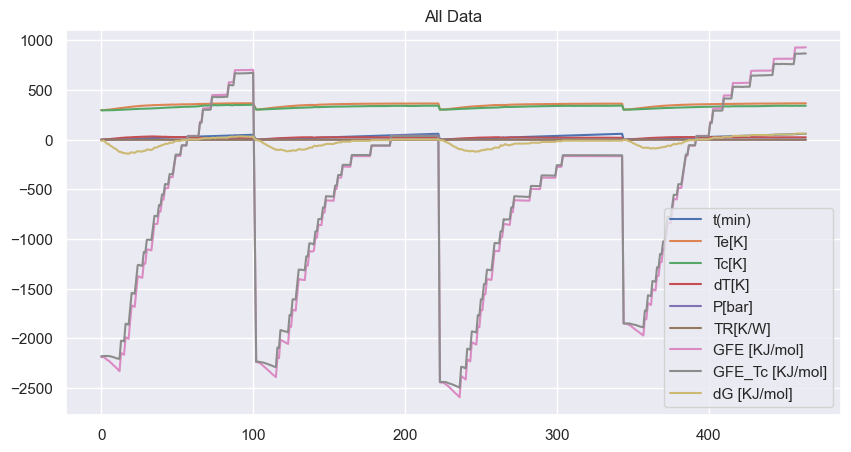

In [7]:
# plotting all data
mdf.PlotAllData(df_gfe)

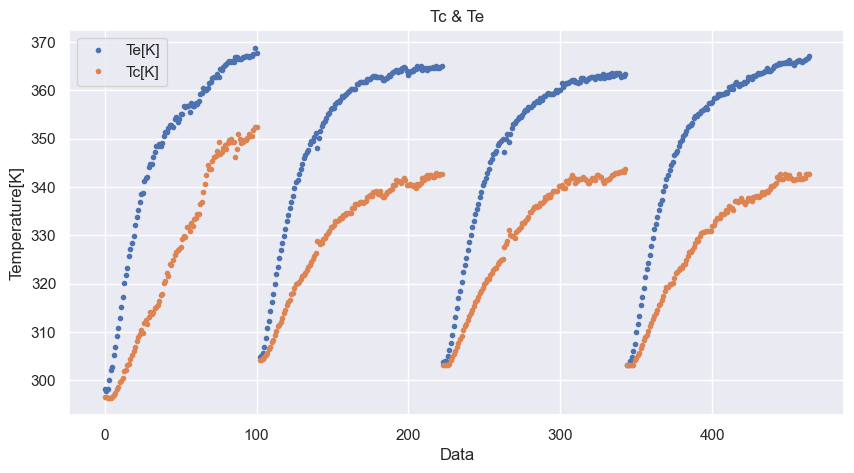

In [8]:
# plotting raw converted data of Tc and Te
mdf.PlotTempData(df_gfe)

# Data Analysis

Data selection (chopping) as per Te temperature

In [9]:
df_selected = mdf.DataChop(df_gfe,300,400)

Optimal range of temperature(Te) for data selection: [Tmin:297.8167, Tmax:369]


In [10]:
df_selected

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
3,1.5,300.150000,296.40,3.750000,0.413299,0.046875,-2204.936063,-2177.388136,-27.547927
4,2.0,302.150000,296.40,5.750000,0.413299,0.071875,-2219.628291,-2177.388136,-42.240154
5,2.5,302.816667,296.65,6.166667,0.413299,0.077083,-2224.525700,-2179.224665,-45.301035
6,3.0,305.150000,296.90,8.250000,0.413299,0.103125,-2241.666632,-2181.061193,-60.605439
7,3.5,306.816667,297.40,9.416667,0.413299,0.117708,-2253.910155,-2184.734250,-69.175905
...,...,...,...,...,...,...,...,...,...
460,58.0,366.150000,341.90,24.250000,1.356501,0.303125,928.194358,866.720336,61.474022
461,58.5,366.350000,341.90,24.450000,1.356501,0.305625,928.701361,866.720336,61.981024
462,59.0,366.550000,342.65,23.900000,1.356501,0.298750,929.208363,868.621595,60.586768
463,59.5,366.750000,342.65,24.100000,1.356501,0.301250,929.715365,868.621595,61.093770


Data re-arrange, grouping and caculation for mean & std

In [11]:
df_mean, df_std = mdf.DataArrange(df_selected, 'data/di_water_exp/60_FR/')

Calculated mean and standard deviation values saved at data/di_water_exp/60_FR/'combined_mean.csv' and 'combined_std.csv'


In [12]:
df_mean

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,300.150000,1.50,296.40,3.750000,0.413299,0.046875,-2204.936063,-2177.388136,-27.547927
1,302.150000,2.00,296.40,5.750000,0.413299,0.071875,-2219.628291,-2177.388136,-42.240154
2,302.816667,2.50,296.65,6.166667,0.413299,0.077083,-2224.525700,-2179.224665,-45.301035
3,303.150000,0.25,303.15,0.000000,0.479960,0.000000,-1850.096252,-1850.096252,0.000000
4,303.750000,0.00,303.15,0.600000,0.379969,0.007500,-2443.723685,-2438.896577,-4.827109
...,...,...,...,...,...,...,...,...,...
223,366.816667,45.10,348.80,18.016667,1.238815,0.225208,652.535560,620.720063,31.815498
224,367.150000,50.00,348.75,18.400000,1.278044,0.230000,747.471898,709.250597,38.221301
225,367.483333,49.00,351.90,15.583333,1.258429,0.194792,702.294560,672.513372,29.781188
226,367.816667,50.00,352.40,15.416667,1.258429,0.192708,702.931591,673.468918,29.462673


In [13]:
df_std

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
3,303.150000,0.353553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,303.950000,0.288675,0.000000,0.000000,0.057730,0.000000,340.841124,339.944026,0.897098
6,304.750000,1.060660,0.707107,0.707107,0.047137,0.008839,267.899625,271.687584,3.787959
7,304.950000,0.707107,0.707107,0.707107,0.023568,0.008839,150.741372,144.657118,6.084254
34,317.150000,0.707107,4.949747,4.949747,0.047137,0.061872,278.800217,233.867779,44.932438
...,...,...,...,...,...,...,...,...,...
218,366.150000,8.526429,4.269807,4.269807,0.089078,0.053373,215.136453,195.276834,20.028462
219,366.350000,2.516611,0.381881,0.381881,0.028311,0.004774,64.745629,60.337447,4.516840
220,366.483333,0.500000,0.877971,0.877971,0.000000,0.010975,0.000000,1.677884,1.677884
223,366.816667,1.850676,1.825171,1.825171,0.026858,0.022815,66.390736,65.921443,1.539975


Calculating of average value of all thermal properties

# Data Visualisation after Data Analysis

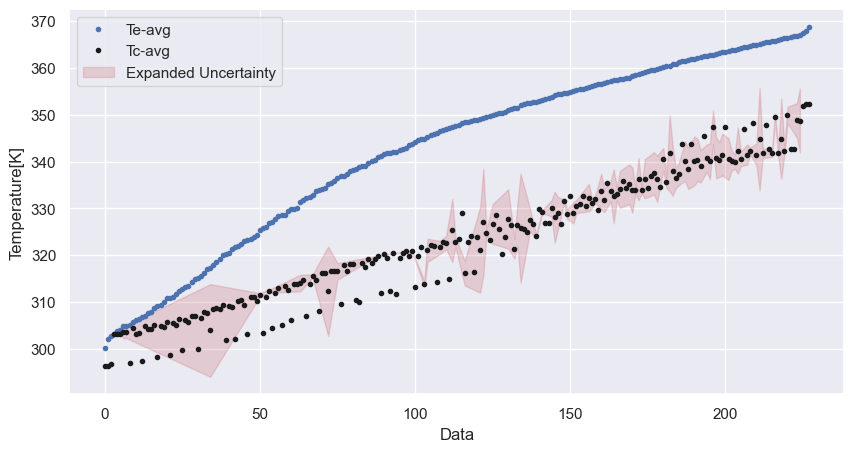

In [14]:
# plotting EU for Tc and Te
mdf.PlotEUTemp(df_mean, df_std)

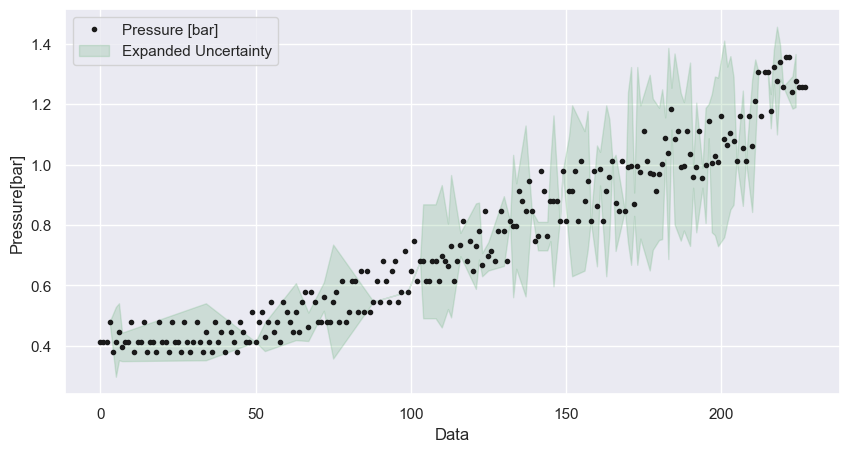

In [15]:
# plotting pressure
mdf.PlotEUPres(df_mean, df_std)

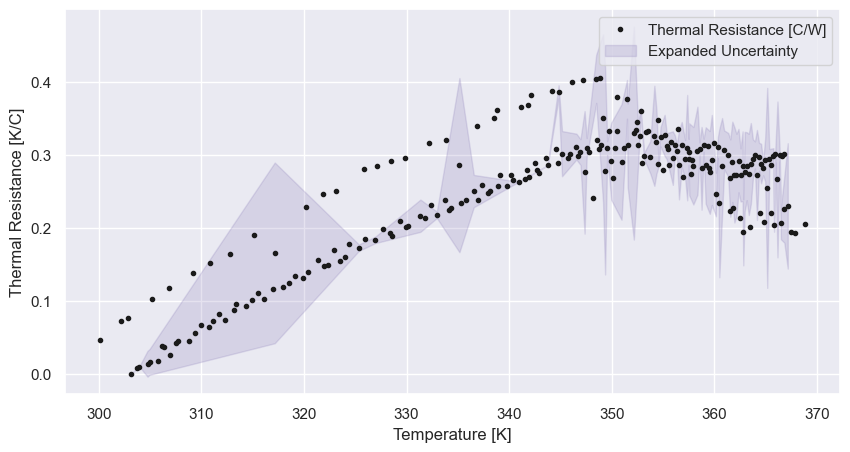

In [16]:
# plotting TR
mdf.PlotEUTR(df_mean,df_std)

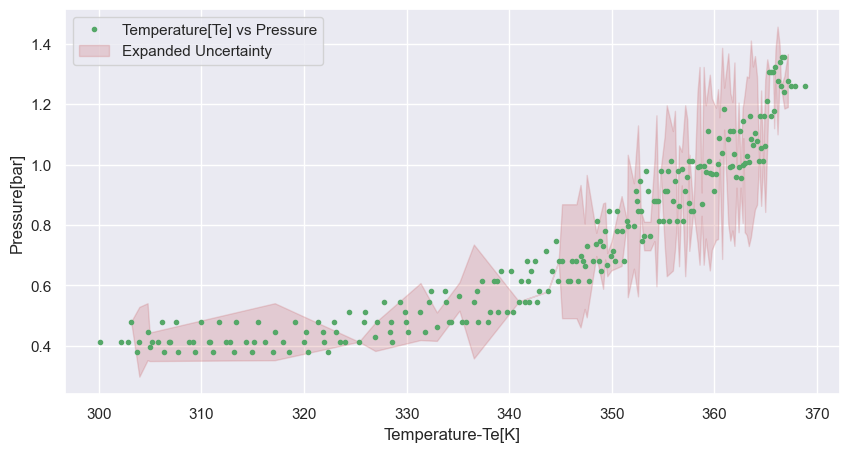

In [17]:
# plotting TP graph
mdf.PlotEUTP(df_mean,df_std)

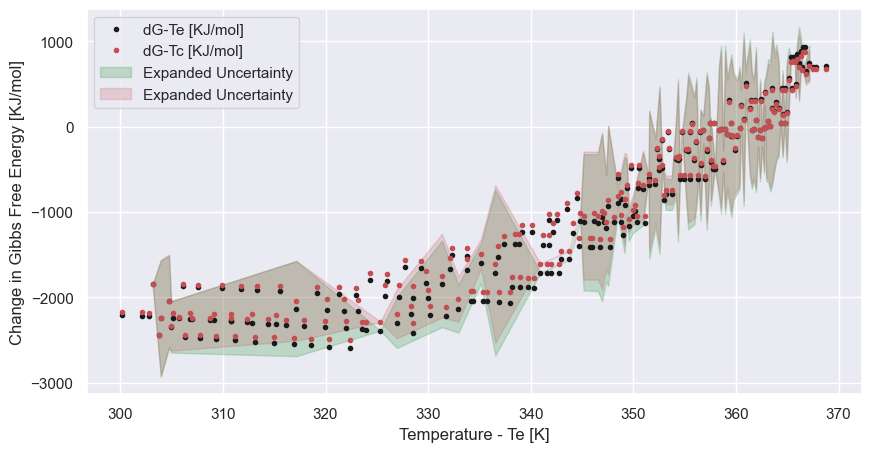

In [18]:
# plotting GFE at Te and Tc
mdf.PlotEUGFE(df_mean, df_std)

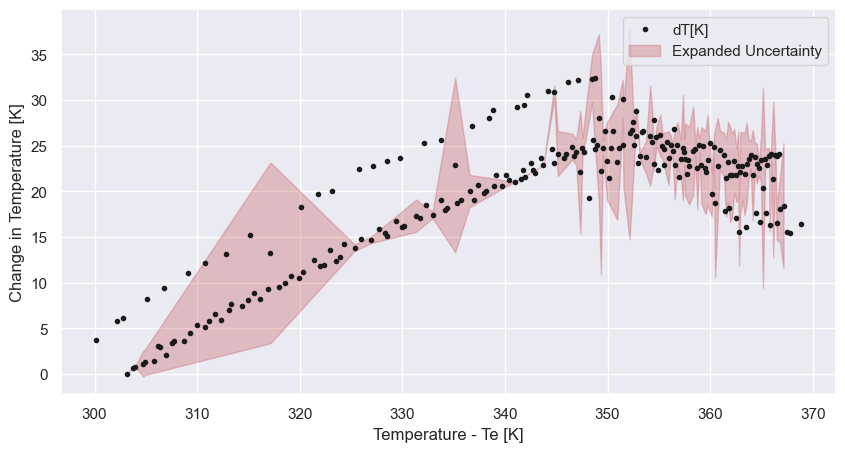

In [19]:
# plotting dT
mdf.PlotEUdT(df_mean, df_std)

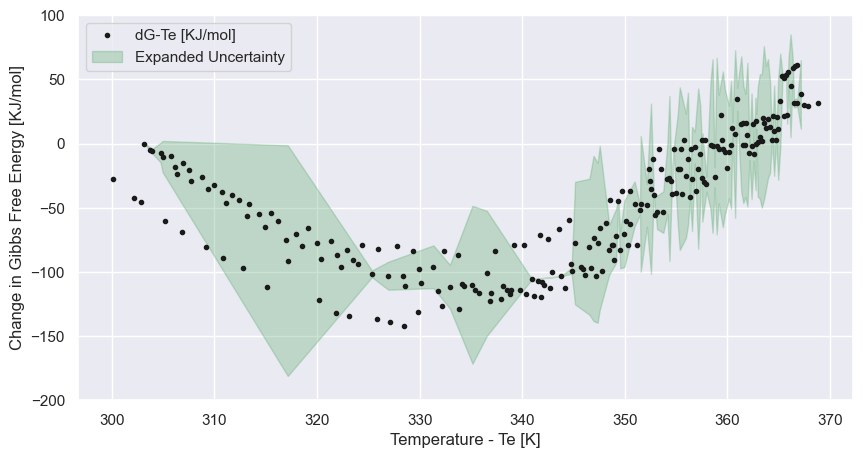

In [20]:
# plotting dG
mdf.PlotEUdG(df_mean, df_std)

# Data Analysis Result

In [21]:
mdf.DataPropAvg(df_mean, df_std)

Tc  average:     322.9413 +- 1.5978 [K]
P   average:     0.7389 +- 0.0686 [bar]
dT  average:     19.6166 +- 1.5978 [K]
TR  average:     0.2452 +- 0.02 [K/W]
GFE average:     -1010.5159 +- 224.7014 [KJ/mol]



Finding best G(T,P) with lowest dG value

In [22]:
mdf.BestTP(df_mean)

Optimal G(T,P) condition at lowest (optimal) dG[-142.4012]
Te optimal:        328.4833[K] 
P  optimal:        0.48[bar] 
dT optimal:        23.3333[K] 
TR optimal:        0.2917[K/W] 
GFE optimal:       dG(328.4833, 0.48) = -2004.7032 [KJ/mol]

